In [1]:
import numpy as np
import random

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
plt.rcParams["figure.figsize"] = (13,13)
plt.rcParams["font.size"] = 16

In [3]:
#self colormap
cmap = matplotlib.colors.ListedColormap(['grey','white', 'black']) # grey for empty cells

def is_happy(x, y, g, R):
    return good_neigh_num(x, y, g) >= R

def good_neigh_num(x, y, g):
    good = g[x, y]
    neighbors = g[x - 1 : x + 2, y - 1 : y + 2]

    good_neigh = 0  #number of good neigbours around the agent
    for agent in neighbors.ravel():
        if good == agent:
            good_neigh += 1
        elif agent == 0:
            good_neigh += 0.5
    return good_neigh

def neigh_locations(x, y, grid):
    return [ (i, j) for i in range(x - 1, x + 2) for j in range(y - 1, y + 2) if grid[i, j] != 0]

def to_update(x, y, grid, R ):
    happy = is_happy(x, y, grid, R)
    unhappy_loc = []
    happy_loc = []

    for i, j in neigh_locations(x, y, grid):
        if i == x and j == y: continue  #self agent, go to next iteration 

        elif (not is_happy(i, j, grid ,R) and not happy and grid[x, y] != grid[i, j]):  #find those, who is unhappier
            unhappy_loc.append((i, j))

        elif ( is_happy(i, j, grid,R) and not happy and grid[x, y] != grid[i, j] and grid[i, j] != 0):  #find those, who is happier
            if 9 - good_neigh_num(i, j, grid) >= good_neigh_num(x, y, grid):
                happy_loc.append((i, j))

    if len(unhappy_loc) != 0:   #if there is some unhappier neigbour, swap with it
        x_new, y_new = random.choice(unhappy_loc)

    elif len(happy_loc) != 0:   #if there is some happier neigbour, swap with it and hope to be happier too
        x_new, y_new = random.choice(happy_loc)

    else:                       #don't swap
        return (-1, -1)
        
    grid[x, y], grid[x_new, y_new] = grid[x_new, y_new], grid[x, y] #swap
    return x_new, y_new


def grid_evolution(R, size, iters):
    R = R * 8   # convert to number of surrounded cells
    grid = np.zeros((size + 2, size + 2))
    grid[1:-1, 1:-1] = np.random.choice([0, 1, 2], (size, size), p=[0, 0.5, 0.5])   # 1 is for empty cell, 2 and 3 are for agents X and O
                                                                                    # p shows that on the grid there are 0% of empty cells, 50% of agent X and 50% of agent O
    unhappy = [(i, j) for i in range(1, size) for j in range(1, size)] #agents who want to move at each iteration
    unhappy = set (unhappy)            #easier to implement as a set
    unhappy_time = np.zeros(iters)   #array for future curve agents - time

    #start moving to be more happy
    for iteration in range(iters):  #limitation for number of iterations, more iterations - more happy agents

        if len(unhappy) == 0: break #stop evolution earlier if there is no unhappy agents

        unhappy_next = set()          #temp set so that swaps wont distruct the grid which is currently processing
        for x, y in unhappy:    
            if not is_happy(x, y, grid, R):          #find unhappy agents
                x_new, y_new = to_update(x, y, grid, R)    #swap neighbours
                if (x_new, y_new) != (-1, -1):             #update locations
                    unhappy_next.update(neigh_locations(x, y, grid))  
                    unhappy_next.update(neigh_locations(x_new, y_new, grid))
                   
        unhappy =  unhappy_next                    #next iteration will be with new unhappy agents
        unhappy_time[iteration] = len(unhappy)    #save number of unhappy agents for the curve 
    return grid[1:-1, 1:-1], unhappy_time
    
# Print final grid   
def plot_grid(R, size, iters):
    plot = grid_evolution(R, size, iters)[0]
    plt.title(f'Neighborhood greed for R = {R}, number of iterations = {iters}')
    plt.imshow(plot, cmap=cmap, vmin =0, vmax =2)
    plt.colorbar(ticks=[0,1,2], location ='bottom', label ='0 is empty, 1 is agent X, 2 is agent O')   

#plot dependency curve
def plot_curve(size, iters):
    plt.figure(figsize=(13, 8))

    for r_n in range(9):
        curve = grid_evolution(r_n/8, size, iters)[1]
        plt.plot(curve, label = "R = " + str(r_n/8))

    plt.title('Number of agents that want to move on each iteration')      
    plt.xlabel('Time ( number of iterations)')
    plt.ylabel('Number of agents that want to move')
    plt.legend()

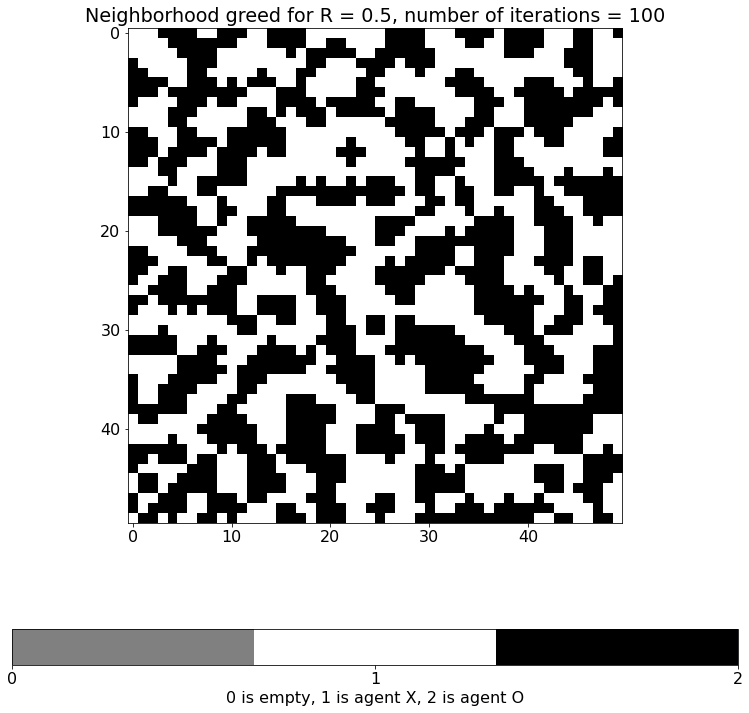

In [4]:
size = 50   #size of map
R = 4/8    #(0, ⅛, 2/8, ⅜, 4/8, ⅝,6/8,⅞, 1)
plot_grid(R, size , 100)

In [29]:
# animate the evolution of the map
def save_gifs(R):
    fig = plt.figure()
    plot = np.zeros((size + 2, size + 2))
    imshow = plt.imshow(plot, cmap=cmap, vmin =0, vmax =2)
    cbar = plt.colorbar(ticks=[0,1,2], location ='bottom', label ='0 is empty, 1 is agent X, 2 is agent O')

    def update(i):
        plt.cla()
        plot = grid_evolution(R, size, i)[0]
        plt.title(f'Neighborhood greed for R = {R}, number of iterations = {i}')
        plt.imshow(plot, cmap=cmap, vmin =0, vmax =2)

    # call the animator	 
    anim = FuncAnimation(fig, update, frames=20, interval=8)

    # save the animation as a gif file 
    anim.save(f"map_r_{R}.gif", writer="pillow")
    plt.close()

for rn in range(9):
    print(f"r = {rn/8} is processing...")
    save_gifs(rn/8)  #R = (0, ⅛, 2/8, ⅜, 4/8, ⅝,6/8,⅞, 1)
 

r = 0.0 is processing...
r = 0.125 is processing...
r = 0.25 is processing...
r = 0.375 is processing...
r = 0.5 is processing...
r = 0.625 is processing...
r = 0.75 is processing...
r = 0.875 is processing...
r = 1.0 is processing...


In [28]:
#demonstate animation examples
HTML('<img width="550" src="map_r_0.0.gif">\
        <img width="550" src="map_r_0.125.gif">\
        <img width="550" src="map_r_0.25.gif">\
        <img width="550" src="map_r_0.375.gif">\
        <img width="550" src="map_r_0.5.gif">\
        <img width="550" src="map_r_0.625.gif">\
        <img width="550" src="map_r_0.75.gif">\
        <img width="550" src="map_r_0.875.gif">\
        <img width="550" src="map_r_1.0.gif">')

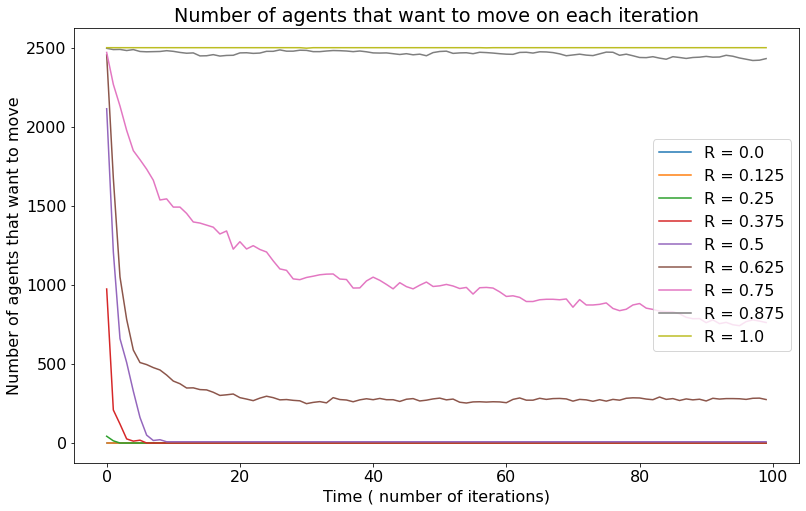

In [88]:
#plot time dependency
plot_curve(50, 100)